[[0.64833882 0.35166118]]
0.875


c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


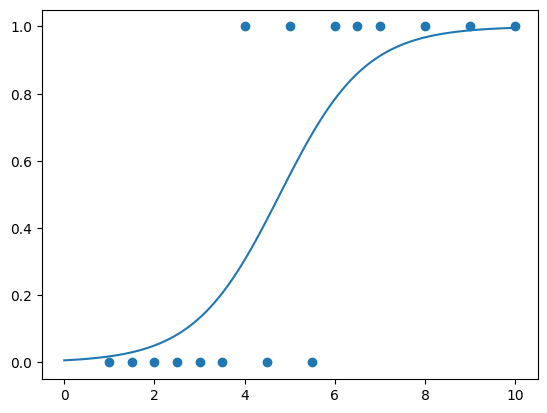

In [ ]:
# ## Question 1: The Basics & The Sigmoid Curve
# We want to predict whether a student will pass or fail an exam based on the number of hours they studied.

# Dataset:

# Python

# import pandas as pd

# data1 = {
#     'Hours_Studied': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10],
#     'Passed_Exam':   [0, 0,   0, 0,   0, 0,   1, 0,   1, 0,   1, 1,   1, 1, 1, 1]  # 0 = Fail, 1 = Pass
# }
# df1 = pd.DataFrame(data1)
# Your Tasks:

# Prepare Data: Define your feature X (Hours_Studied) and target Y (Passed_Exam).

# Build and Train: Import LogisticRegression from sklearn.linear_model, create an instance, and fit it to your data.

# Get Probabilities: Use the .predict_proba() method to predict the probabilities for a student who studied for 4.2 hours. What is the predicted probability of passing?

# Get Class Prediction: Use the .predict() method to predict the class (0 or 1) for a student who studied for 2.1 hours.

# Calculate Accuracy: Import accuracy_score from sklearn.metrics. Calculate the accuracy of your model on the entire training data.

# Visualize (Optional but Recommended):

# Create a scatter plot of Hours_Studied vs. Passed_Exam.

# To see the "S-curve" (sigmoid), plot the model's predicted probabilities across a range of hours (e.g., from 0 to 10).


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data1 = {
    'Hours_Studied': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10],
    'Passed_Exam':   [0, 0,   0, 0,   0, 0,   1, 0,   1, 0,   1, 1,   1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}
df = pd.DataFrame(data1)
# display(df)


x = df[['Hours_Studied']]
y = df['Passed_Exam']

model = LogisticRegression()

model.fit(x,y)


print(model.predict_proba([[4.2]])) #probability of passing is 0.64833882 or 64.83% and probability of failing is 0.35166118 or 35.16%

model.predict([[2.1]]) # probability of passing when studied 2.1 hours is 0%
y_pred = model.predict(x)

print(accuracy_score(y,y_pred))


plt.scatter(x,y)
x_sigmoid = np.linspace(0, 10, 100).reshape(-1,1)
y_sigmoid = model.predict_proba(x_sigmoid)
plt.plot(x_sigmoid,y_sigmoid[:,1])
plt.show();

,Age,Blood_Test_Value,Has_Disease
0,25,1.1,0
1,30,1.3,0
2,35,1.0,0
3,40,1.8,0
4,45,2.5,1
5,50,1.9,0
6,55,2.9,1
7,60,3.5,1
8,65,4.0,1
9,70,4.2,1


[0 0 0 0 0 0 1 1 1 1 1 1]
0.8333333333333334
[[5 1]
 [1 5]]


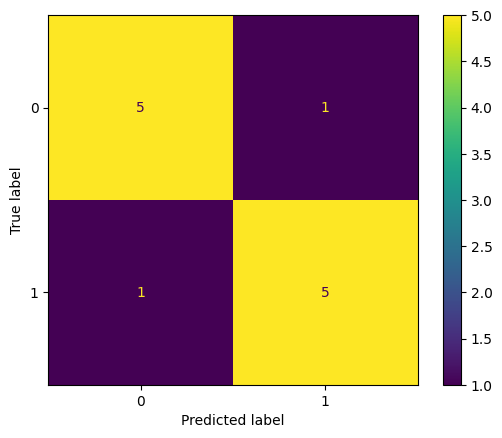

0.8333333333333334
0.8333333333333334


In [57]:
# ## Question 2: The Confusion Matrix (Precision & Recall)
# A hospital wants to build a simple model to predict if a patient has a certain disease based on their age and the result of a single blood test. "1" means they have the disease.

# Dataset:

# Python

# import pandas as pd

# data2 = {
#     'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
#     'Blood_Test_Value': [1.1, 1.3, 1.0, 1.8, 2.5, 1.9, 2.9, 3.5, 4.0, 4.2, 4.1, 4.8],
#     'Has_Disease': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] # 0 = No Disease, 1 = Has Disease
# }
# df2 = pd.DataFrame(data2)
# Your Tasks:

# Build Model: Define X (using both 'Age' and 'Blood_Test_Value') and Y. Train a LogisticRegression model.

# Get Predictions: Get the model's class predictions (y_pred) for the training data.

# Calculate Accuracy: What is the model's accuracy?

# The Confusion Matrix:

# Import and print the confusion_matrix from sklearn.metrics.

# Based on the matrix, how many patients were:

# Correctly predicted as "No Disease" (True Negatives)?

# Incorrectly predicted as "Has Disease" (False Positives)?

# Incorrectly predicted as "No Disease" (False Negatives)?

# Correctly predicted as "Has Disease" (True Positives)?

# Calculate Precision & Recall:

# Import and print the precision_score and recall_score.

# Interpret: In your own words, what is the difference between this model's precision and its recall? (Hint: Think about what "False Positive" vs. "False Negative" means in a medical context).
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt


data2 = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
    'Blood_Test_Value': [1.1, 1.3, 1.0, 1.8, 2.5, 1.9, 2.9, 3.5, 4.0, 4.2, 4.1, 4.8],
    'Has_Disease': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] # 0 = No Disease, 1 = Has Disease
}
df = pd.DataFrame(data2)
display(df)

model = LogisticRegression()

x = df[['Age','Blood_Test_Value']]
y = df['Has_Disease']

model.fit(x,y)

y_pred = model.predict(x)
print(y_pred)
print(accuracy_score(y,y_pred))


confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show();


# Correctly predicted as "No Disease" (True Negatives)? - 5 True Negatives

# Incorrectly predicted as "Has Disease" (False Positives)? 1 False Positive

# Incorrectly predicted as "No Disease" (False Negatives)? - 1 False Negative

# Correctly predicted as "Has Disease" (True Positives)? - 5 True Positives

print(precision_score(y,y_pred))
print(recall_score(y,y_pred))

# by reading the precision score - When the model predicts a patient has the disease, it is correct 83.3% of the time. (True Positives / All Predicted Positives   TP/(TP+FP)) 
# and recall score  i can say that out of all the patients who actually have the disease, the model successfully found 83.3% of them (True Positives / All Actual Positives TP/(TP+FN))

In [ ]:
# ## Question 3: Coefficient Interpretation & Thresholding 💳
# A bank wants to predict the probability that a new credit card applicant will default on their loan (fail to pay). They have data on the applicant's income and their current outstanding debt.

# Dataset:

# Python

# import pandas as pd
# import numpy as np

# data3 = {
#     'Annual_Income_k': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
#     'Outstanding_Debt_k': [1, 2, 1, 5, 3, 6, 2, 4, 8, 5, 9, 3, 7, 10, 6, 12],
#     'Defaulted': [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] # 1 = Defaulted
# }
# df3 = pd.DataFrame(data3)
# Your Tasks:

# Build Model: Train a logistic regression model to predict Defaulted using Annual_Income_k and Outstanding_Debt_k.

# Interpret Coefficients:

# Print the model.coef_ and model.intercept_.

# What do the signs (positive/negative) of the coefficients for Income and Debt tell you? (e.g., "As income increases, the likelihood of default...")

# Advanced: Get the Odds Ratios by calculating np.exp(model.coef_). How would you interpret these numbers? (e.g., "For every $1k increase in debt, the odds of default are multiplied by...").

# Adjusting the Threshold:

# Get the predicted probabilities (.predict_proba()) for the training data.

# The default threshold for .predict() is 50% (0.5).

# In banking, a "False Negative" (predicting 'No Default' when they will default) is very costly. To be safer, the bank wants to flag anyone who has more than a 30% (0.3) chance of defaulting.

# Using the probabilities you calculated, write a line of code to create a new set of predictions based on this 0.3 threshold.

# How many applicants are flagged for default using the 0.5 threshold vs. the 0.3 threshold?

[[0.00321636 1.42105036]]
[-6.3253753]
[[1.00322153 4.14146821]]
[0.00797121 0.03271106 0.00822961 0.71269942 0.12814193 0.91386324
 0.03535314 0.38979061 0.99479072 0.73204471 0.9987771  0.14125373
 0.98006941 0.99971836 0.9245949  0.9999841 ]
[0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1]
[0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1]


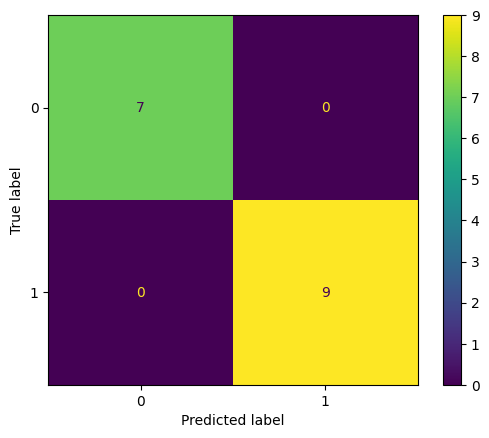

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

data3 = {
    'Annual_Income_k': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'Outstanding_Debt_k': [1, 2, 1, 5, 3, 6, 2, 4, 8, 5, 9, 3, 7, 10, 6, 12],
    'Defaulted': [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] # 1 = Defaulted
}
df = pd.DataFrame(data3)
# display(df)

x = df[['Annual_Income_k', 'Outstanding_Debt_k']]
y = df['Defaulted']

model = LogisticRegression()

model.fit(x,y)


print(model.coef_)
print(model.intercept_)

# the coefficient tells me that the relationship between Defaulted and Annual_Income_k and Outstanding_Debt_k is positive. As income increases the likelihood of Default goes up by a factor of 0.003 while outstanding_debt_k contributes by 1.421
print(np.exp(model.coef_))


probabilities = model.predict_proba(x)
probabilities_class_1 = probabilities[:,1]
print(probabilities_class_1)


y_pred = model.predict(x)
confusion_matrix = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()

print(y_pred)

custom_threshold = 0.3
y_pred_with_custom_threshold = (probabilities_class_1>=custom_threshold).astype(int)
print(y_pred_with_custom_threshold)


#with custom threshold i can see 10 people flagged as defaulted whereas with the normal threhold value i can see 9 people defaulted.